## Multiple Object Tracking

In [1]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
from random import randint

Default tracking algorithm MOSSE 
Available algorithms are: 

Selected boxes [(766, 331, 54, 43), (798, 398, 66, 55), (986, 354, 57, 39)] 
Choose Tracker : 

0 - Boosting
1 - MIL
2 - KCF
3 - TLD
4 - MEDIANFLOW
5 - GOTURN
6 - MOSSE
7 - CSRT
Choose Tracker : 

0 - Boosting
1 - MIL
2 - KCF
3 - TLD
4 - MEDIANFLOW
5 - GOTURN
6 - MOSSE
7 - CSRT
Choose Tracker : 

0 - Boosting
1 - MIL
2 - KCF
3 - TLD
4 - MEDIANFLOW
5 - GOTURN
6 - MOSSE
7 - CSRT


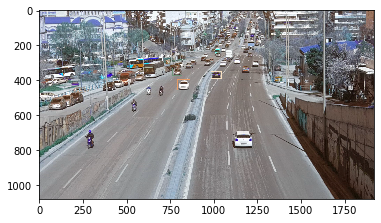

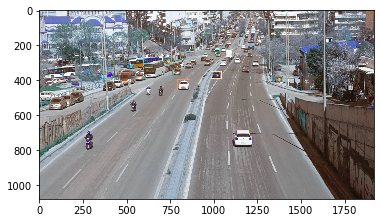

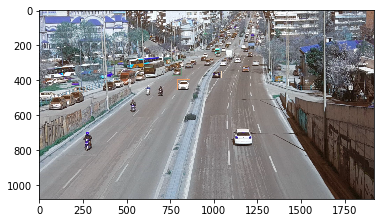

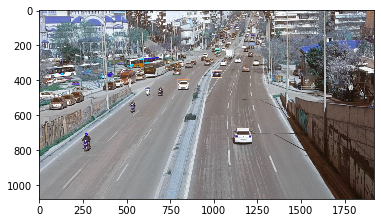

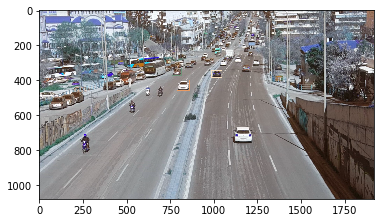

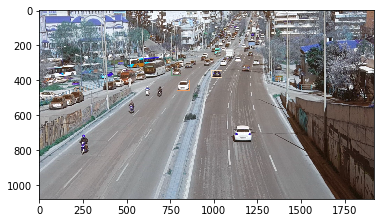

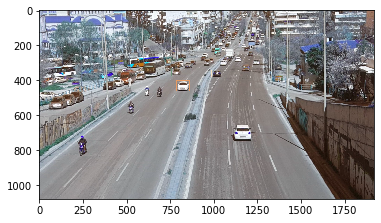

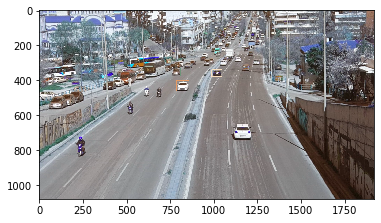

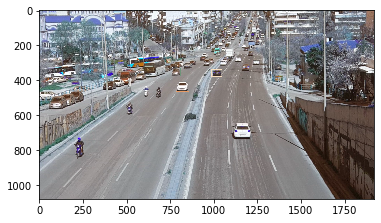

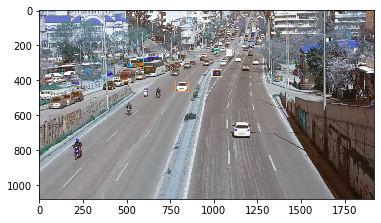

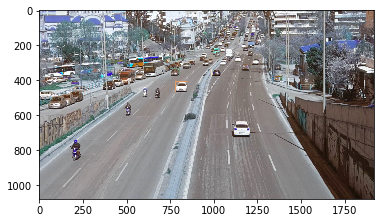

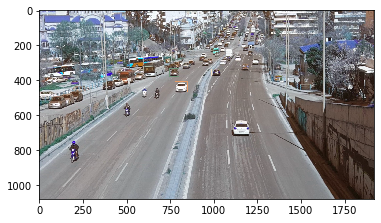

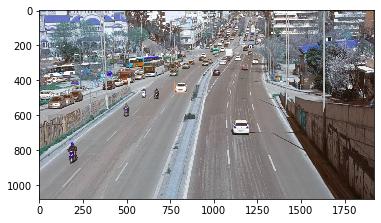

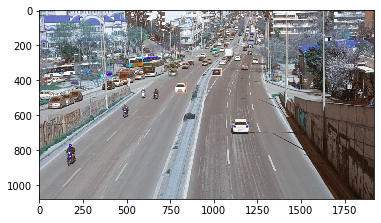

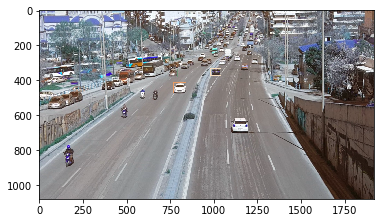

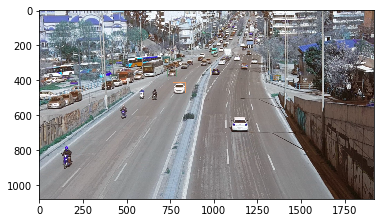

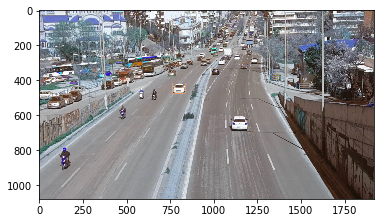

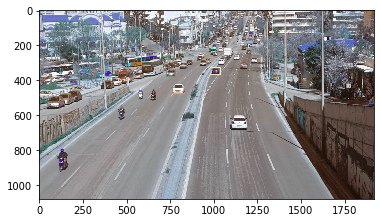

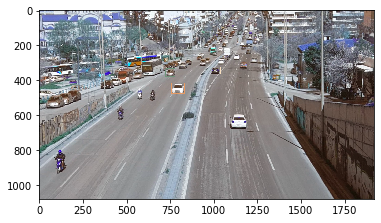

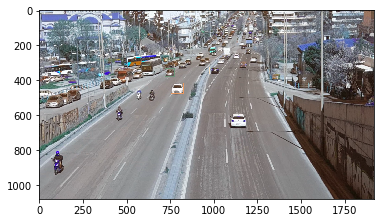

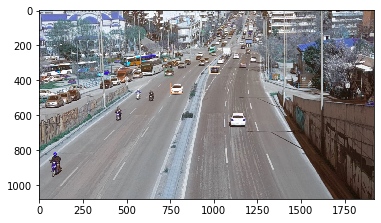

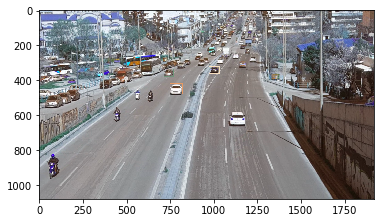

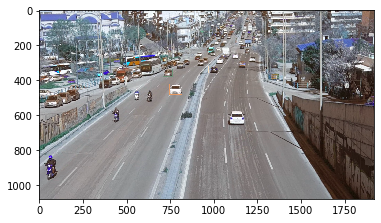

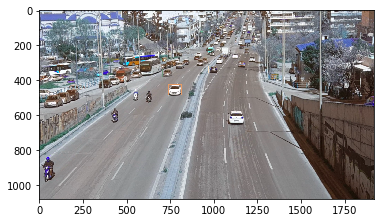

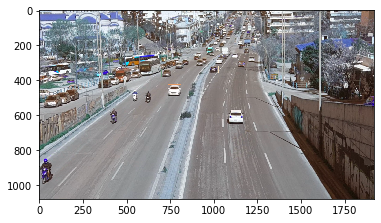

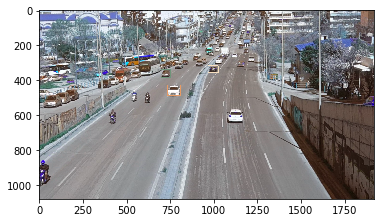

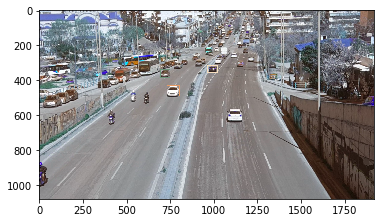

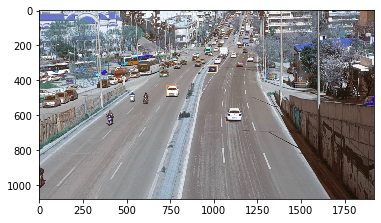

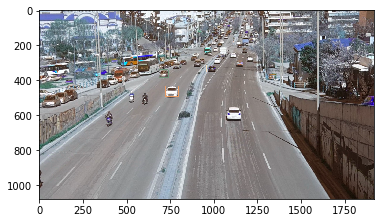

In [2]:
# Tracker Types
def tracker(choice):
    print("Choose Tracker : \n")
    print("0 - Boosting")
    print("1 - MIL")
    print("2 - KCF")
    print("3 - TLD")
    print("4 - MEDIANFLOW")
    print("5 - GOTURN")
    print("6 - MOSSE")
    print("7 - CSRT")
    
    choice = choice#input("Select tracker : ")
    
    if choice == '0':
        tracker = cv2.TrackerBoosting_create()
    if choice == '1':
        tracker = cv2.TrackerMIL_create()
    if choice == '2':
        tracker = cv2.TrackerKCF_create()
    if choice == '3':
        tracker = cv2.TrackerTLD_create()
    if choice == '4':
        tracker = cv2.TrackerMedianFlow_create()
    if choice == '5':
        tracker = cv2.TrackerGOTURN_create()
    if choice == '6':
        tracker = cv2.TrackerMOSSE_create()
    if choice == '7':
        tracker = cv2.TrackerCSRT_create()
    
    return tracker



if __name__ == '__main__':
    print("Default tracking algorithm MOSSE \n"
        "Available algorithms are: \n")
#     for ta in TrackerTypes:
#         print(ta)
        
    trackerType = '6'

    cap = cv2.VideoCapture('Video/Vehicles.mp4')
    success ,frame = cap.read()    
    
    if not success:
        print("File Error")
    
    rects = []
    colors = []
    
    n_obj = 3
    for _ in range(n_obj):
        # draw rectangles, select ROI, open new window
        rect_box = cv2.selectROI('Multi-tracker', frame)
        rects.append(rect_box)
        colors.append( (randint(64,255),randint(64,255),randint(64,255)) )
        
#         print("q key to stop selecting")
#         if cv2.waitKey(0) & 0xFF == 113:
        #break 
        
    
    print(f'Selected boxes {rects} ')
    # Create multitracker
    multitracker = cv2.MultiTracker_create()
    # Initialize multitracker
    for rect_box in rects:
        multitracker.add(tracker(trackerType), frame, rect_box)
        #tracker_name(tracker_types)
    
    #Video and Tracker
    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break
        # update location objects
        success, boxes = multitracker.update(frame)
        # draw the objectes tracked
        for i, newbox in enumerate(boxes):
            pts1 = (int(newbox[0]),int(newbox[1]))
            pts2 = (int(newbox[0]+newbox[2]),int(newbox[1]+newbox[3]))
            cv2.rectangle(frame, pts1,pts2, colors[i],2,1)
            
        cv2.imshow("Multi-track",frame)
        plt.imshow(frame)
        plt.show()
        
        k = cv2.waitKey(60) & 0xff
        if k == 27:
            break

            
cv2.destroyAllWindows()
cap.release()